# Segmentaci√≥n de im√°genes

Normalmente, para extraer caracter√≠sticas basadas en descriptores de forma, es necesario, previamente, llevar a cabo alguna t√©cnica de segmentaci√≥n que permita delimitar la regi√≥n de inter√©s que se desea analizar.

Los algoritmos de segmentaci√≥n se basan en particionar la imagen digital en diferentes segmentos (objetos) para simplificar la representaci√≥n de la imagen y facilitar la comprensi√≥n de su contenido.

Las t√©cnicas de segmentaci√≥n permiten asignar una etiqueta a cada p√≠xel de la imagen de manera que los p√≠xeles con la misma etiqueta comparten caracter√≠sticas similares.

Existen dos tipos de segmentaci√≥n:

- **Segmentaci√≥n sem√°ntica**. Consiste en un problema de clasificaci√≥n a nivel de p√≠xel que permite asignar una etiqueta de objeto a cada p√≠xel para delimitar regiones de inter√©s. Por ejemplo, diferenciar un grupo de personas del fondo de la imagen.

- **Segmentaci√≥n de instancia**. Consiste en una tarea m√°s compleja que implica llevar a cabo una detecci√≥n de objetos para asignar una etiqueta de instancia a cada objeto. Es decir, la segmentaci√≥n de instancia permite identificar objetos que comparten las mismas propiedades como objetos independiente. Por ejemplo, diferenciar cada persona de un grupo de personas en una imagen.

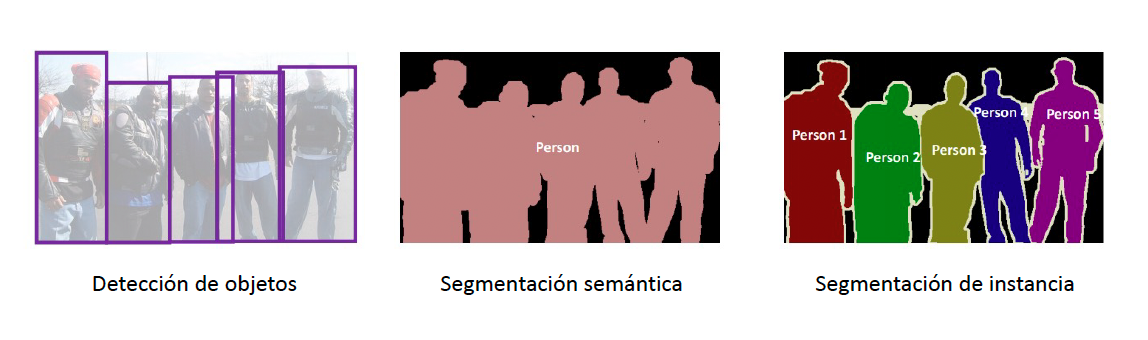


## Aplicaciones

- Sistemas de ayuda al diagn√≥stico mediante an√°lisis de im√°genes m√©dicas. Por
ejemplo: resonancia magn√©tica, TAC, imagen histol√≥gica, im√°genes de fondo de
ojo, radiograf√≠as, ultrasonido, etc.

- Reconocimiento de objetos. Por ejemplo, detecci√≥n de peatones, localizaci√≥n de
objetos en im√°genes por sat√©lite (carreteras, bosques, cultivos, etc.)

- Reconocimiento de patrones en temas de seguridad. Por ejemplo,
reconocimiento de caras (face recognition), reconocimiento de huellas dactilares
(fingerprint recognition) o reconocimiento del iris.

- Sistemas de control de tr√°fico y conducci√≥n aut√≥noma. Por ejemplo, detecci√≥n
de se√±ales de tr√°fico, reconocimiento de matr√≠culas, self driving

### T√©cnicas

- M√©todos de umbralizaci√≥n (thresholding)
- M√©todos de agrupaci√≥n (clustering)
- Detecci√≥n de bordes
- Crecimiento de regiones (regi√≥n growing)
- Watershed
- Autoencoders (Redes Neuronales Convolucionales)

### SEGMENTACI√ìN MEDIANTE THRESHOLDING

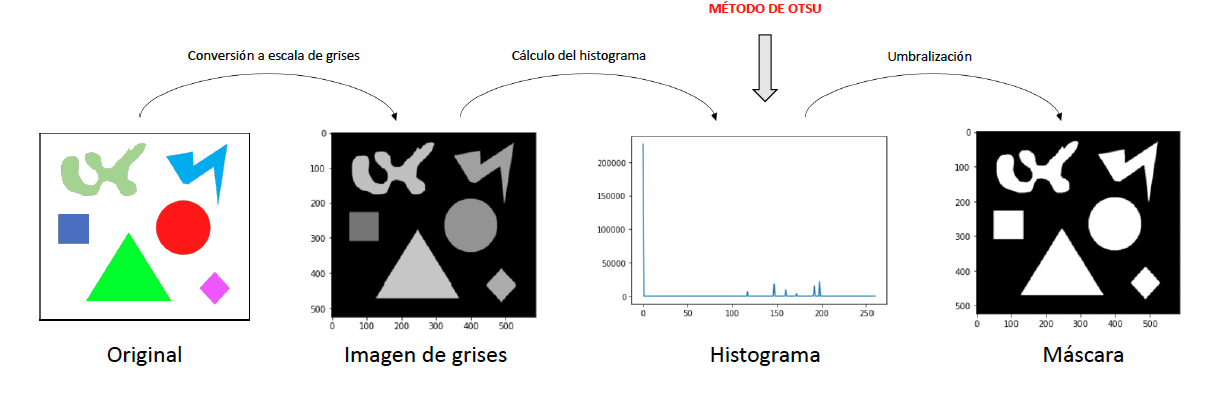

In [ ]:
#!pip install opencv-python

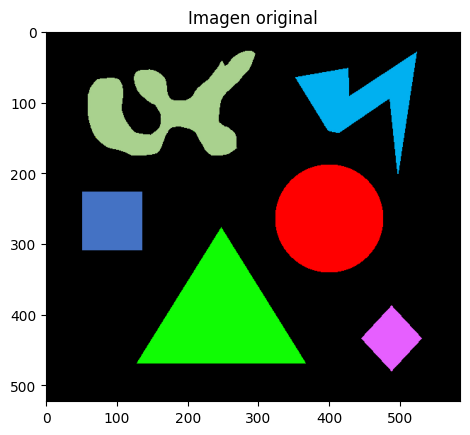

In [3]:
import matplotlib.pyplot as plt
import cv2

# Read an image
img = cv2.imread('images/figuras.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb, cmap='gray')
#plt.imshow(img, cmap='gray')
plt.title('Imagen original')
plt.show()

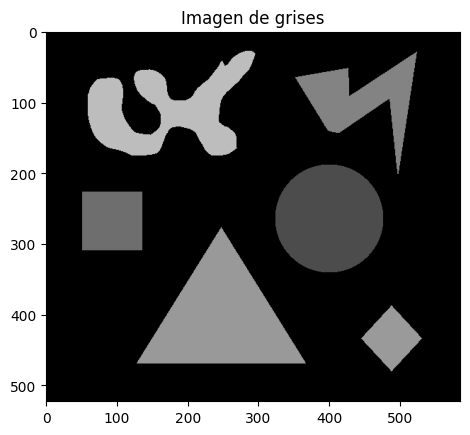

In [4]:
# Convertimos la imagen a escala de grises
import numpy as np
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Lo pasamos a Gris
#gray_img = cv2.imread('figuras.png', 0) # Una forma de leer la imagen directamente en escala de grises

plt.imshow(gray_img, cmap='gray')
plt.title('Imagen de grises')
plt.show()

### Histograma

cv2.calcHist(images, channels, mask, histSize, ranges)

- images: This is the image that we want to compute a histogram for. Wrap it as a list: [myImage]
    
    
- channels : A list of indexes, where we specify the index of the channel we want to compute a histogram for. To compute a histogram of a grayscale image, the list would be [0]. To compute a histogram for all three red, green, and blue channels, the channels list would be [0, 1, 2]

- mask: Remember learning about masks in my Image Masking with OpenCV guide? Well, here we can supply a mask. If a mask is provided, a histogram will be computed for masked pixels only. If we do not have a mask or do not want to apply one, we can just provide a value of None
    
    
- histSize: This is the number of bins we want to use when computing a histogram. Again, this is a list, one for each channel we are computing a histogram for. The bin sizes do not all have to be the same. Here is an example of 32 bins for each channel: [32, 32, 32] 

- ranges: The range of possible pixel values. Normally, this is [0, 256] (that is not a typo ‚Äî the ending range of the cv2.calcHist function is non-inclusive so you‚Äôll want to provide a value of 256 rather than 255) for each channel, but if you are using a color space other than RGB [such as HSV], the ranges might be different.)

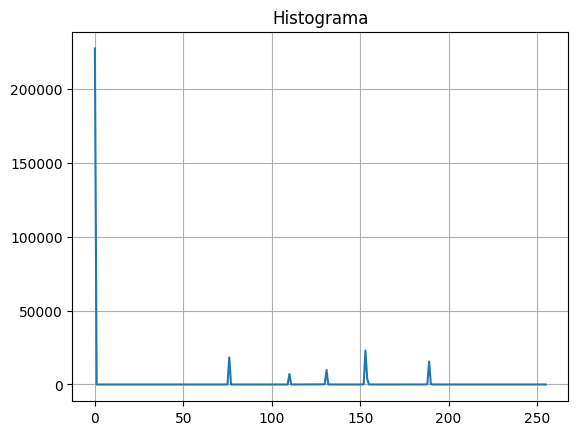

In [5]:
# Calculamos el histograma

hist = cv2.calcHist([gray_img], [0], None, [256], [0, 256]) # [0] son los canales, None la m√°scara


plt.plot(hist)
plt.grid()
plt.title('Histograma')
plt.show()

# Otra forma de mostrar el histograma (solo visualizaci√≥n)
# plt.hist(gray_img.ravel(), bins=50)
# plt.grid(True)
# plt.show()

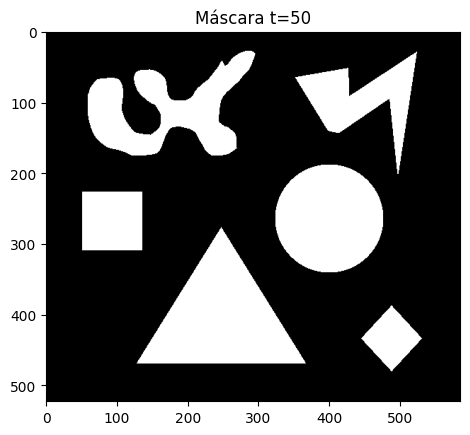

[  0 255]


In [16]:
# Fijamos el umbral en base al histograma anterior
t = 50

# Extreaemos la m√°scara binaria
maxim = 255 #Aqu√≠ puedo definir el valor m√°ximo que puede tener la m√°scara, en este caso binario, 0 y 1
_, mask = cv2.threshold(gray_img, t, maxim, cv2.THRESH_BINARY)

# Otra formas de extraer la m√°scara 
# mask = gray_img.copy()
# mask = mask>t

# Visualizamos para corroborar
plt.imshow(mask, cmap='gray')
plt.title('M√°scara t=' + str(t))
plt.show()

print(np.unique(mask)) # Atent@s a los formatos (bool, uint8, etc.)

### M√©todo Otsu

El m√©todo de Otsu es un procedimiento no param√©trico que permite obtener el umbral √≥ptimo maximizando la varianza entre clases. B√∫squeda exhaustiva.
Se parte de una imagen con N p√≠xeles que puede tomar L valores de grises diferentes

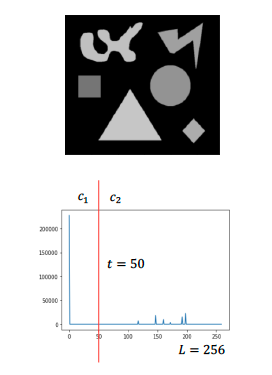

[0 1]


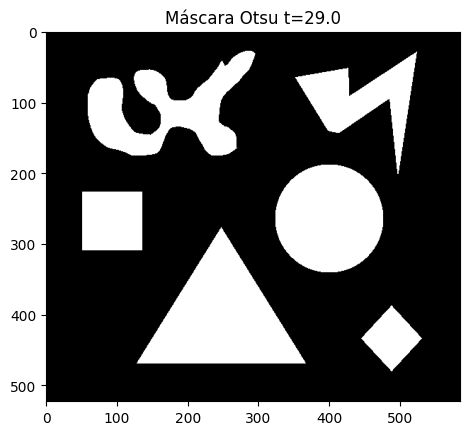

In [15]:
# Fijamos el umbral con el m√©todo de OTSU
t, mask = cv2.threshold(gray_img,0,1,cv2.THRESH_OTSU) # 0 es por defecto y 1 es el valor m√°ximo de la m√°scara
#t, mask = cv2.threshold(gray_img,0,1,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
print(np.unique(mask))

# Visualizamos para corroborar que se obtiene el mismo resultado
plt.imshow(mask, cmap='gray')
plt.title('M√°scara Otsu t=' + str(t))
plt.show()

### SEGMENTACI√ìN MEDIANTE CONVERSIONES DE COLOR

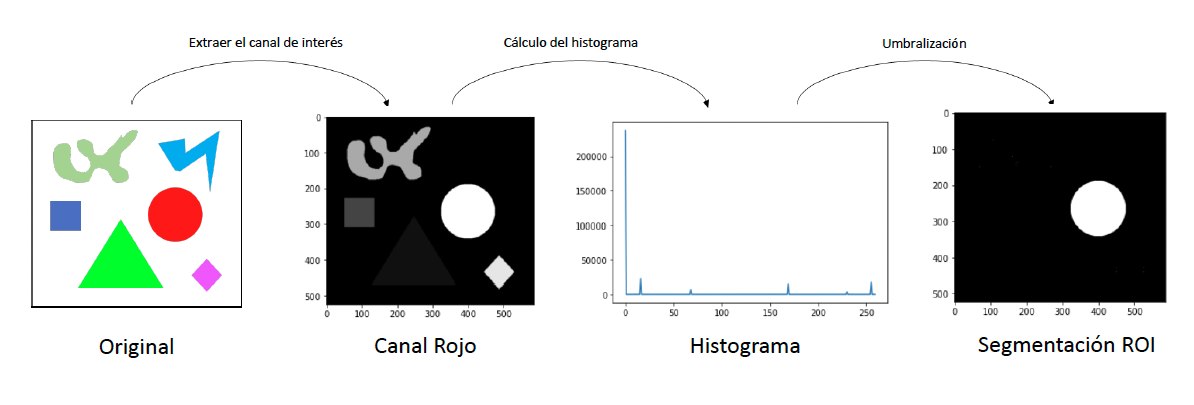

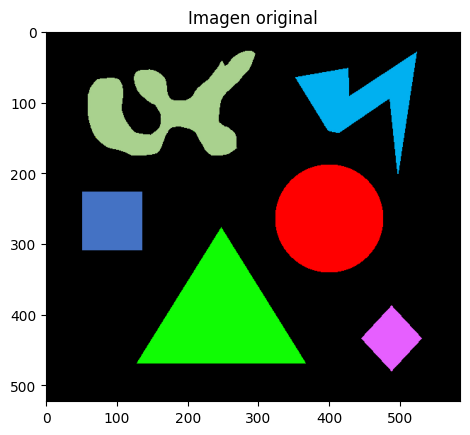

In [17]:
# Imaginamos que queremos segmentar √∫nicamente el c√≠rculo
img = cv2.imread('images/figuras.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb, cmap='gray')
plt.title('Imagen original')
plt.show()

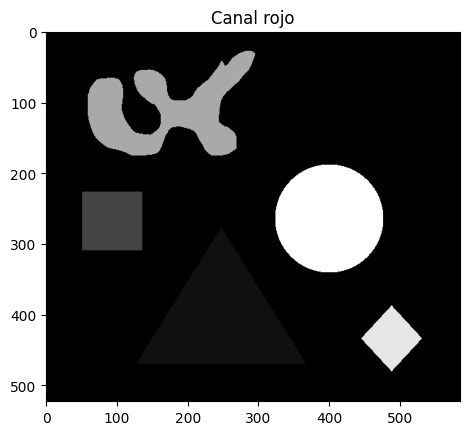

In [18]:
# Obtenemos el canal rojo
R = img[:,:,2]

plt.imshow(R, cmap='gray')
plt.title('Canal rojo')
plt.show()

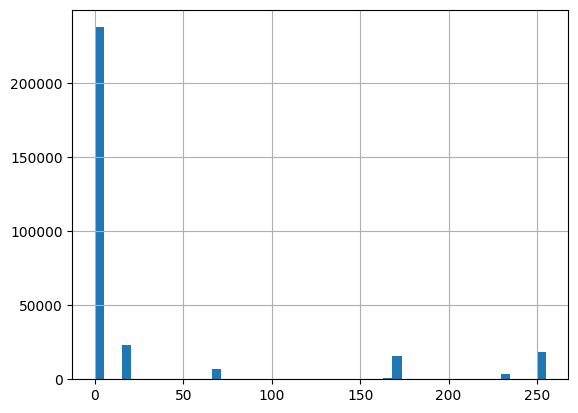

255


In [19]:
# Observamos el histograma
plt.hist(R.ravel(), bins=50)
plt.grid(True)
plt.show()
print(np.max(R))

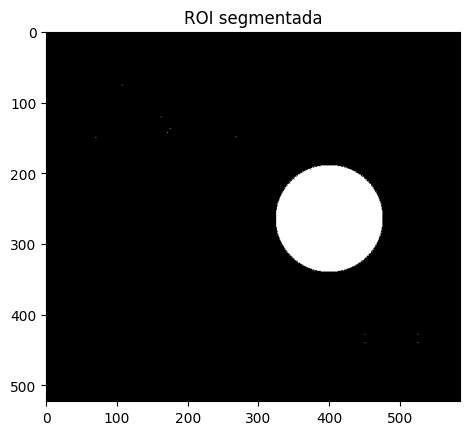

In [20]:
# Fijamos el umbral y extraemos la m√°scara
t=np.max(R) #Umbral
mask = R.copy()
mask[mask<t] = 0 #Lo que esta por debajo de la m√°scara lo pongo a 0

plt.imshow(mask, cmap='gray')
plt.title('ROI segmentada')
plt.show()

In [21]:
# Ejercicio individual
# Obtener una m√°scara con la imagen del rayo azul mediante segmentaci√≥n por espacio de color
# Funci√≥n para extraer los colores secundarios
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [ ]:
def convert_to_CMYK(rgb_p):
    with np.errstate(invalid='ignore', divide='ignore'):
        K = 1 - np.max(rgb_p, axis=2)
        C = (1-rgb_p[:,:,0] - K)/(1-K)
        M = (1-rgb_p[:,:,1] - K)/(1-K)
        Y = (1-rgb_p[:,:,2] - K)/(1-K)
    CMYK = (np.dstack((C,M,Y,K)))
    return CMYK

In [22]:
# Leer la imagen 
img = cv2.imread('images/figuras.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rgb_p = rgb.astype('uint8')/255

# Extraer los colores secundarios
CMYK = convert_to_CMYK(rgb_p)

# Extraer los canales por separado
C,M,Y,K = cv2.split(CMYK)
C = C.astype('uint8')

# Calcular la m√°scara de la figura del rayo
t, mask = cv2.threshold(C,0,1,cv2.THRESH_OTSU)

t=np.max(C) #Umbral
mask = C.copy()
mask[mask<t] = 0

# Visualizar la m√°scara
plt.imshow(C, cmap='gray')
plt.title('ROI segmentada')
plt.show()

NameError: name 'convert_to_CMYK' is not defined

### SEGMENTACI√ìN SEM√ÅNTICA CON DETECCI√ìN DE BORDES

Cuando hablamos de bordes de una imagen, hablamos de los p√≠xeles donde hay un cambio de intensidad.

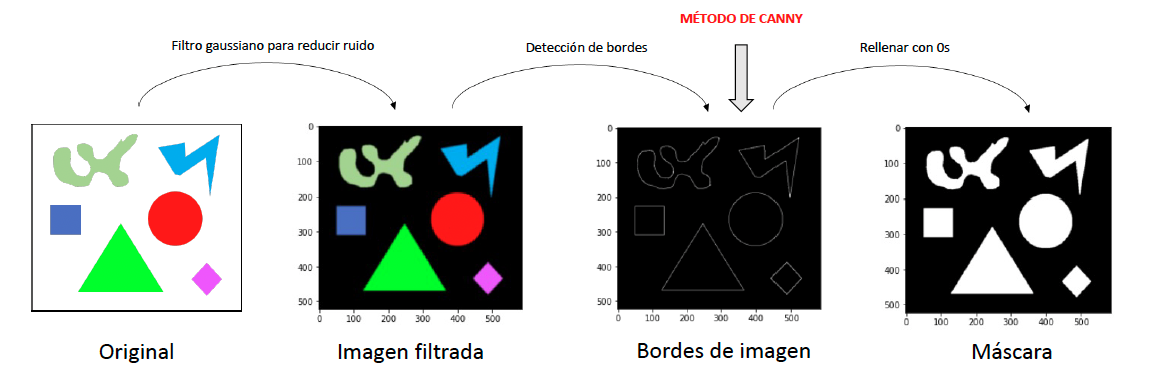


#### Detecci√≥n de bordes - M√©todo Canny

1. Detector de bordes con Sobel
El operador Sobel se basa en el c√°lculo de la primera derivada para obtener el gradiente de la intensidad de una imagen en cada p√≠xel. Es decir, mide cambios de intensidad en la imagen. Para ello, aplica dos m√°scaras de convoluciones con kernels de 3x3 elementos, uno para los cambios horizontales y otro para los verticales.
De esta manera, se obtienen ùëÆùíô y ùëÆùíö que representan las aproximaciones de las derivadas de intensidades.
En cada p√≠xel de la imagen, se combinan las aproximaciones de las derivadas para obtener la magnitud ùëÆ y la direcci√≥n ùöØ del gradiente. La direcci√≥n de los p√≠xeles puede ser en estos √°ngulos (0, 45, 90, o 135)

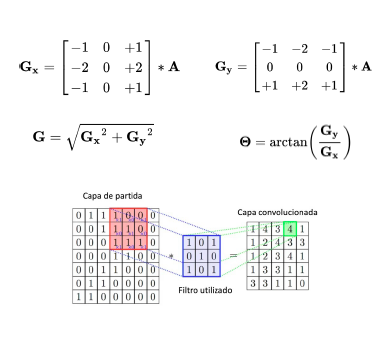

2. Filtrado de bordes mediante la supresi√≥n non-m√°ximum
Esta t√©cnica permite adelgazar los bordes bas√°ndose en el gradiente. El objetivo es eliminar los p√≠xeles que no corresponden a un borde. Se compara el valor de intensidad de cada p√≠xel con el valor de intensidad de los p√≠xeles vecinos en la direcci√≥n del gradiente. Si es mayor, ese p√≠xel se considera borde.

3. Umbralizaci√≥n por hist√©resis
El umbral por hist√©resis se centra en establecer dos umbrales (uno m√°ximo y otro m√≠nimo).
- Si el valor del p√≠xel es mayor que el umbral m√°ximo, el p√≠xel se considera parte del borde.
- Si el valor del p√≠xel es menor que el umbral m√≠nimo, el p√≠xel no se considera parte del borde.
- Si el valor del p√≠xel est√° entre el m√≠nimo y el m√°ximo umbral, ser√° borde si est√° conectado a un p√≠xel que s√≠ es parte del borde.


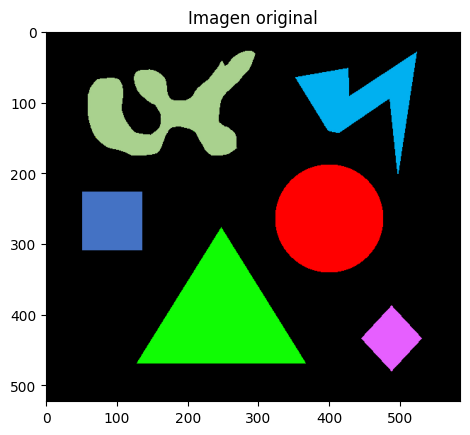

In [41]:
# SEGMENTACI√ìN SEM√ÅNTICA CON DETECCI√ìN DE BORDES
img = cv2.imread('images/figuras.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title('Imagen original')
plt.show()

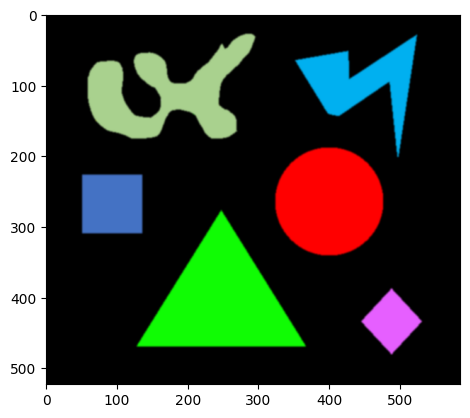

In [42]:
# Aplicamos un filtro gaussiano para emborronar las altas frecuencias
img_gaus = cv2.GaussianBlur(img_rgb, (5,5), 0) # (5x5) es el tama√±o del filtro y 0 es la desviaci√≥n est√°ndar
plt.imshow(img_gaus, cmap='gray')
plt.show()

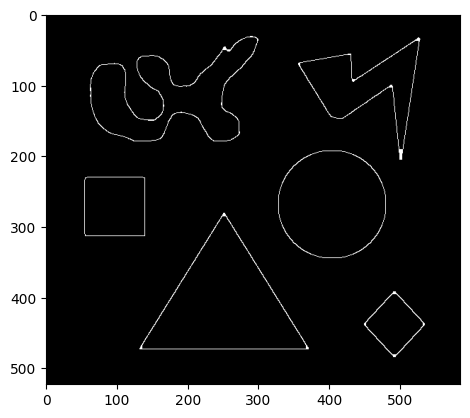

In [46]:
# Detecci√≥n de bordes de Canny
canny = cv2.Canny(img_gaus, 255/3, 255) # minValue and maxValue. Canny recomienda que minValue sea 3 veces mayor que maxValue

#kernel = np.ones((2,2), 'uint8')
#canny = cv2.dilate(canny, kernel, iterations=2) ## Me permite hacer m√°s gruesos los bordes
#canny = cv2.erode(canny, kernel, iterations=2) ## Me permite hacer afinar los bordes

plt.imshow(canny, cmap='gray')
plt.show()

/var/folders/j3/cj2m33117h1g9l38ly6r6vgw0000gn/T/ipykernel_73722/2220132281.py:2: DeprecationWarning: Please use `binary_fill_holes` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  from scipy.ndimage.morphology import binary_fill_holes as bfh


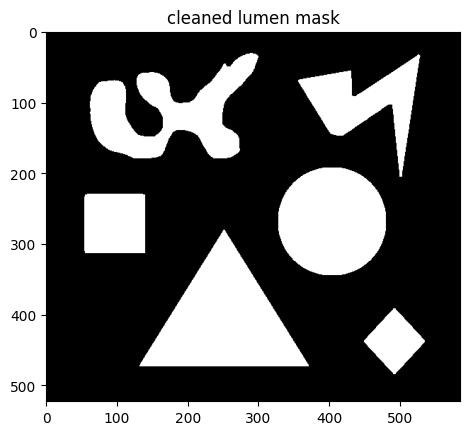

In [47]:
# Rellenar objetos (solo rellena si no est√°n en contacto con el l√≠mite de la imagen)
from scipy.ndimage.morphology import binary_fill_holes as bfh
bordes = canny.copy()
filled_bordes = bfh(bordes)

plt.imshow(filled_bordes.astype('uint8'), cmap='gray')
plt.title('cleaned lumen mask')
plt.show()

### SEGMENTACI√ìN POR CRECIMIENTO DE REGIONES (region growing)

In [ ]:
#!pip install scikit-image

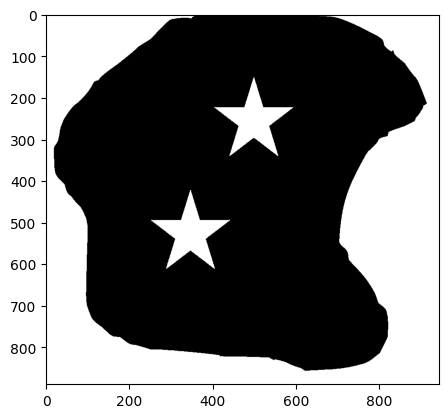

In [48]:
# Cargar imagen
from skimage import io
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('images/estrellas.png', 0)

plt.imshow(img, cmap='gray')
plt.show()

In [51]:
# Crear una copia de la imagen
mask = img.copy()

# Definir una imagen negra de referencia
h, w = img.shape
ref = np.zeros((h+2, w+2), np.uint8)

# Fijar la semilla. En este caso en la esquina superior izquierda (posici√≥n 0,0) para rellenar a partir de ah√≠
cv2.floodFill(mask, ref, (0,0), 0); # Como nos interesa rellenar de negro, utilizamos el 0 en la √∫ltima posici√≥n

fig, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('original')
ax[1].imshow(mask, cmap='gray'), ax[1].set_title('m√°scara')
plt.show()

error: OpenCV(4.7.0) /Users/xperience/GHA-OCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/floodfill.cpp:505: error: (-2:Unspecified error) in function 'int cv::floodFill(cv::InputOutputArray, cv::InputOutputArray, cv::Point, cv::Scalar, cv::Rect *, cv::Scalar, cv::Scalar, int)'
>  (expected: 'mask.rows == size.height + 2'), where
>     'mask.rows' is 890
> must be equal to
>     'size.height + 2' is 891
